# Bay Wheels Ridership Analysis

## by Michael Harjani

## Investigation Overview

Find out how different types of users use the bikes, also what makes a successful Bikesharing city

## Dataset Overview

The dataset is comprised of 32 different files downloaded from BayWheels/Lyft's site. There had to be some adjustments made as the format of the file changed at April 2020. After the adjustments were made, they were stitched together and after some filtering, comprising of 6,331,056 bike rides and 20 columns. Additionally, 7 columns were added to assist while working with dates. 

In [1]:
# Package Importation
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib as mpl

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

y2017   = pd.read_csv('2017-fordgobike-tripdata.csv')
y201801 = pd.read_csv('201801-fordgobike-tripdata.csv')
y201802 = pd.read_csv('201802-fordgobike-tripdata.csv')
y201803 = pd.read_csv('201803-fordgobike-tripdata.csv')
y201804 = pd.read_csv('201804-fordgobike-tripdata.csv')
y201805 = pd.read_csv('201805-fordgobike-tripdata.csv')
y201806 = pd.read_csv('201806-fordgobike-tripdata.csv')
y201807 = pd.read_csv('201807-fordgobike-tripdata.csv')
y201808 = pd.read_csv('201808-fordgobike-tripdata.csv')
y201809 = pd.read_csv('201809-fordgobike-tripdata.csv')
y201810 = pd.read_csv('201810-fordgobike-tripdata.csv')
y201811 = pd.read_csv('201811-fordgobike-tripdata.csv')
y201812 = pd.read_csv('201812-fordgobike-tripdata.csv')
y201901 = pd.read_csv('201901-fordgobike-tripdata.csv')
y201902 = pd.read_csv('201902-fordgobike-tripdata.csv')
y201903 = pd.read_csv('201903-fordgobike-tripdata.csv')
y201904 = pd.read_csv('201904-fordgobike-tripdata.csv')
y201905 = pd.read_csv('201905-baywheels-tripdata.csv')
y201906 = pd.read_csv('201906-baywheels-tripdata.csv')
y201907 = pd.read_csv('201907-baywheels-tripdata.csv')
y201908 = pd.read_csv('201908-baywheels-tripdata.csv')
y201909 = pd.read_csv('201909-baywheels-tripdata.csv')
y201910 = pd.read_csv('201910-baywheels-tripdata.csv')
y201911 = pd.read_csv('201911-baywheels-tripdata.csv')
y201912 = pd.read_csv('201912-baywheels-tripdata.csv')
y202001 = pd.read_csv('202001-baywheels-tripdata.csv')
y202002 = pd.read_csv('202002-baywheels-tripdata.csv')
y202003 = pd.read_csv('202003-baywheels-tripdata.csv')
y202004 = pd.read_csv('202004-baywheels-tripdata.csv')
y202005 = pd.read_csv('202005-baywheels-tripdata.csv')
y202006 = pd.read_csv('202006-baywheels-tripdata.csv')
y202007 = pd.read_csv('202007-baywheels-tripdata.csv')

# Removing rides that don't belong in their month's dataset
y202002 = y202002[y202002['start_time'].astype(str).str[5:7] == '02']
y202003 = y202003[y202003['start_time'].astype(str).str[5:7] == '03']

# Combining the old formats together
oldcols = y2017.append(y201801).append(y201802).append(y201803).append(y201804).append(y201805).append(y201806).append(y201807).append(y201808).append(y201809).append(y201810).append(y201811).append(y201812).append(y201901).append(y201902).append(y201903).append(y201904).append(y201905).append(y201906).append(y201907).append(y201908).append(y201909).append(y201910).append(y201911).append(y201912).append(y202001).append(y202002).append(y202003)

# Combining the new formats together
newcols = y202004.append(y202005).append(y202006).append(y202007)

In [3]:
# Renaming the old columns the new terminology or make less wordy
oldcols.rename(columns={'start_time': 'started_at', 'end_time': 'ended_at',
                        'start_station_latitude': 'start_lat', 'start_station_longitude': 'start_lng',
                        'end_station_latitude': 'end_lat', 'end_station_longitude': 'end_lng',
                       'rental_access_method': 'rent_method'}, inplace=True)

oldcols.rename(columns = {'start_station_id': 'start_id', 'end_station_id': 'end_id',
                         'start_station_name': 'start_name', 'end_station_name': 'end_name'}, inplace=True)

newcols.rename(columns = {'start_station_id': 'start_id', 'end_station_id': 'end_id',
                         'start_station_name': 'start_name', 'end_station_name': 'end_name'}, inplace=True)

# Dropping 'duration_sec' as the new columns don't have them and they will be recreated anyway
oldcols.drop(['duration_sec'], axis=1, inplace=True)

# Dropping 'ride_id' as it is a unique classifier of each of the rides and doesn't contain any extractable information
newcols.drop(['ride_id'], axis=1, inplace=True)

# Going to use the old column names while the current values, they make the most sense for me
oldcols.user_type.replace('Customer', 'Casual', inplace=True)
oldcols.user_type.replace('Subscriber', 'Member', inplace=True)


newcols.rename(columns={'member_casual': 'user_type', 'is_equity': 'bsfa'}, inplace=True)

# Capitalizing user_type on the new columns
newcols.user_type.replace('casual', 'Casual', inplace=True)
newcols.user_type.replace('member', 'Member', inplace=True)

# Capitalizing 'rent_method'
oldcols.rent_method.replace('app', 'App', inplace=True)
oldcols.rent_method.replace('clipper', 'Clipper', inplace=True)

# Also renaming 'bike_share_for_all_trip' to 'bsfa' as it is way too long and prone to spelling errors
oldcols.rename(columns={'bike_share_for_all_trip': 'bsfa'}, inplace=True)
oldcols.bsfa.replace('No', False, inplace=True)
oldcols.bsfa.replace('Yes', True, inplace=True)

newcols.bsfa.replace('False', False, inplace=True)
newcols.bsfa.replace('True', True, inplace=True)

# Creating a new column combines both 'user_type' and 'bsfa' as 'bsfa' is a subset within 'member' in 'user_type'

oldcasual = oldcols[oldcols['user_type'] == 'Casual']
newcasual = newcols[newcols['user_type'] == 'Casual']

oldmember = oldcols[oldcols['user_type'] == 'Member']
newmember = newcols[newcols['user_type'] == 'Member']

oldbsfa = oldmember[oldmember['bsfa'] == True]
newbsfa = newmember[newmember['bsfa'] == True]

oldmember = oldmember[oldmember['bsfa'] != True]
newmember = newmember[newmember['bsfa'] != True]

oldcasual['user_class'] = 'Casual'
newcasual['user_class'] = 'Casual'
oldmember['user_class'] = 'Member'
newmember['user_class'] = 'Member'
oldbsfa['user_class'] = 'BSFA'
newbsfa['user_class'] = 'BSFA'

oldcols = oldcasual.append(oldmember).append(oldbsfa)
newcols = newcasual.append(newmember).append(newbsfa)


# Recreating ride_type for the old columns (refer to Exploration sheet for more information)
oldcols['dig_len'] = oldcols['bike_id'].astype(str).str.len()

normal = oldcols[oldcols['dig_len'] < 6]
ebike = oldcols[oldcols['dig_len'] == 6]

normal['ride_type'] = 'Docked'
ebike['ride_type'] = 'Electric'
oldcols = normal.append(ebike)

oldcols.drop(columns = 'dig_len', axis = 1, inplace=True)

newcols.rename(columns={'rideable_type': 'ride_type'}, inplace=True)
newcols.ride_type.replace('docked_bike', 'Docked', inplace=True)
newcols.ride_type.replace('electric_bike', 'Electric', inplace=True)

bikes = oldcols.append(newcols)

In [4]:
# Drop the milliseconds and convert to DateTime
bikes['started_at'] = bikes['started_at'].astype(str).str[:19]
bikes['ended_at'] = bikes['ended_at'].astype(str).str[:19]

bikes['started_at'] = pd.to_datetime(bikes['started_at'])
bikes['ended_at'] = pd.to_datetime(bikes['ended_at'])

# Adding more features to make sorting easier
bikes['start_date'] = pd.DatetimeIndex(bikes['started_at']).date

bikes['start_year'] = pd.DatetimeIndex(bikes['started_at']).year
bikes['start_month'] = pd.DatetimeIndex(bikes['started_at']).month

bikes['start_dow'] = pd.DatetimeIndex(bikes['started_at']).dayofweek
bikes['start_hour'] = pd.DatetimeIndex(bikes['started_at']).hour

bikes['start_yymm'] = bikes['start_year'].map(str)+ '-' + bikes['start_month'].map(str)
bikes['start_yymm'] = pd.to_datetime(bikes['start_yymm'], format = '%Y-%m').dt.strftime('%Y-%m')

# Categorically organizing days of the week
bikes['dow'] = bikes['start_dow']
bikes.dow.replace(0, 'Mon', inplace=True)
bikes.dow.replace(1, 'Tue', inplace=True)
bikes.dow.replace(2, 'Wed', inplace=True)
bikes.dow.replace(3, 'Thu', inplace=True)
bikes.dow.replace(4, 'Fri', inplace=True)
bikes.dow.replace(5, 'Sat', inplace=True)
bikes.dow.replace(6, 'Sun', inplace=True)

dow_class = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dows = pd.api.types.CategoricalDtype(ordered = True, categories = dow_class)
bikes['dow'] = bikes['dow'].astype(dows)

In [5]:
# Adding Duration
bikes['duration'] = (bikes['ended_at'] - bikes['started_at']).astype('<m8[s]').astype(int)

# Creating the start_city column
sanfran = bikes[bikes['start_lng'] < -122.35]
oakland = bikes[bikes['start_lng'].between(-122.35,-122.05)]
sanjose = bikes[bikes['start_lng'] > -122.05]

sanfran['start_city'] = 'San Francisco'
oakland['start_city'] = 'Oakland'
sanjose['start_city'] = 'San Jose'

bikes = sanfran.append(oakland.append(sanjose))

# Calculating the distance between two points
bikes['delta_lat'] = abs(bikes['start_lat'] - bikes['end_lat'])
bikes['delta_lng'] = abs(bikes['start_lng'] - bikes['end_lng'])

bikes['distance'] = np.sqrt(((bikes['delta_lat']*1.26)**2) + bikes['delta_lng']**2)*88.2

bikes.drop(['delta_lat', 'delta_lng'], axis=1, inplace=True)

# Calculating average speed from start to finish
bikes['speed'] = (bikes['distance'] / (bikes['duration'] / 3600))

In [6]:
# Filtering trips

# Not in Bay Area
bikes = bikes[bikes['start_lng'] < -110]
bikes = bikes[bikes['end_lng'] < -110]

# Aren't even 1 second long
bikes = bikes[bikes['duration'] > 0]

# Longer than 1 day
bikes = bikes[bikes['duration'] < 86400]

# Averaging in excess of 100kph
bikes = bikes[bikes['speed'] < 100]

# Longer than 100km
bikes = bikes[bikes['distance'] < 100]

In [7]:
# Setting a colour scheme
usercolours = sb.color_palette('Paired')[1:2] + sb.color_palette('Paired')[3:4] + sb.color_palette('Paired')[5:6]

citycolours = [(0.113725490196078, 0.258823529411765, 0.541176470588235),
              (0.0196078431372549, 0.219607843137255, 0.192156862745098),
              (0.917647058823529, 0.447058823529412, 0)]

ridecolours = [(0, 0.43921568627451, 0.8), 
              (0.92156862745098, 0.0392156862745098, 0.549019607843137)]

rentalcolours = [(0.333333333333333, 0.125490196078431, 0.517647058823529),
                (0.788235294117647, 0.0274509803921569, 0.168627450980392)]

In [8]:
# Ordering categorical types so they are presented the same way everytime
user_type_class = ['Casual', 'Member']
user_types = pd.api.types.CategoricalDtype(ordered = True, categories = user_type_class)
bikes['user_type'] = bikes['user_type'].astype(user_types)

user_class_class = ['Casual', 'Member', 'BSFA']
user_classes = pd.api.types.CategoricalDtype(ordered = True, categories = user_class_class)
bikes['user_class'] = bikes['user_class'].astype(user_classes)

ride_type_class = ['Docked', 'Electric']
ride_types = pd.api.types.CategoricalDtype(ordered = True, categories = ride_type_class)
bikes['ride_type'] = bikes['ride_type'].astype(ride_types)

city_type_class = ['San Francisco', 'Oakland', 'San Jose']
city_types = pd.api.types.CategoricalDtype(ordered = True, categories = city_type_class)
bikes['start_city'] = bikes['start_city'].astype(city_types)

rental_type_class = ['App', 'Clipper']
rental_types = pd.api.types.CategoricalDtype(ordered = True, categories = rental_type_class)
bikes['rent_method'] = bikes['rent_method'].astype(rental_types)

## Univariate Exploration

## Duration

Duration has a long tailed distribution, with many short trips, and very few extremely long ones. When plotted on a log-scale, the duration distribution resembles an even bell curve with the peak at about 8-10 minutes. 

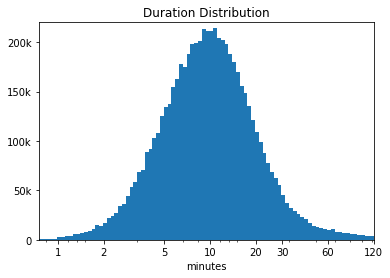

In [9]:
log_binsize = 0.025
bin_edges = 10 ** np.arange(1, np.log10(bikes['duration'].max())+log_binsize, log_binsize)

plt.hist(data = bikes, x = 'duration', bins = bin_edges)
plt.xscale('log')
plt.xticks([60, 120, 300, 600, 1200, 1800, 3600, 7200], [1, 2, 5, 10, 20, 30, 60, 120])
plt.xlabel('minutes')
plt.xlim([45, 7200])

plt.title('Duration Distribution')

plt.yticks([0, 50000, 100000, 150000, 200000], [0, '50k', '100k', '150k', '200k'])
plt.ylim([0, 220000])

plt.show();

## Distance

Distance has a long tailed distribution, with most of the trips being fairly short with some extremely long ones. When taking the distribution to a log scale, it normalizes with a peak at around 1.5. What gets missed on the log scale are the trips that have a value of 0. The trip started and ended at the same location, about 2.7% of all trips end where they began. 

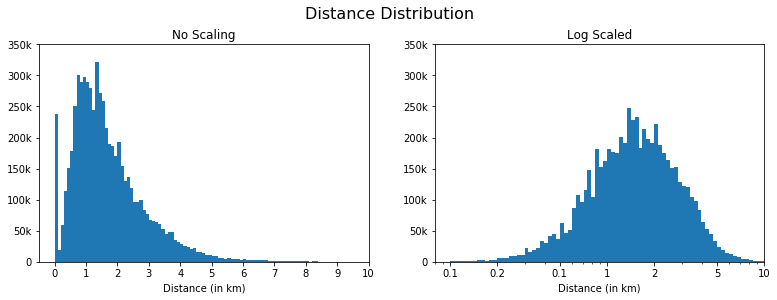

In [10]:
fig = plt.figure(figsize = [13,4])
plt.suptitle('Distance Distribution', y = 1.01, fontsize = 16)

plt.subplot(1,2,1)
bin_edges = np.arange(0, 10+0.1, 0.1)

plt.hist(data = bikes, x = 'distance', bins=bin_edges)
plt.xticks(np.arange(0, 10+1, 1))
plt.xlabel('Distance (in km)')
plt.xlim([-0.5,10])

plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4], [0, '50k', '100k', '150k', '200k', '250k', '300k', '350k'])
plt.title('No Scaling')



plt.subplot(1,2,2)
log_binsize = 0.025
bin_edges = 10 ** np.arange(-1, np.log10(bikes['distance'].max())+log_binsize, log_binsize)

plt.hist(data = bikes, x = 'distance', bins = bin_edges)
plt.xscale('log')
plt.xticks([0.1, 0.2, 0.5, 1, 2, 5, 10], [0.1, 0.2, 0.1, 1, 2, 5, 10])
plt.xlabel('Distance (in km)')
plt.xlim([0.08, 10])
plt.ylim([0, 250000])
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4], [0, '50k', '100k', '150k', '200k', '250k', '300k', '350k'])
plt.title('Log Scaled')

plt.show();

## Speed

Speed's distribution is fairly normal with a peak at around 10km. Two key factors to note are the fat tail on the left side as well as the spike at the beginning, rides with a speed of 0. Similar to Distance, these are trips that start and end at the same location. 

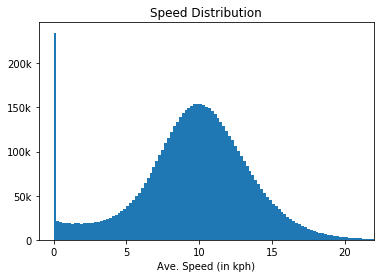

In [11]:
bin_edges = np.arange(0, 24, 0.2)
    
plt.hist(data = bikes, x = 'speed', bins=bin_edges)

plt.xlim([-1, 22])
plt.xticks(np.arange(0, 25, 5))
plt.xlabel('Ave. Speed (in kph)')


plt.yticks(np.arange(0, 25e4, 5e4), ['0', '50k', '100k', '150k', '200k'])

plt.title('Speed Distribution')

plt.show();

## City Ridership

Between the three cities, San Francisco is by far the most popular city, accounting for 75% of all BayWheel's trips, quadrupling Oakland and more than San Jose by a factor of 12. 

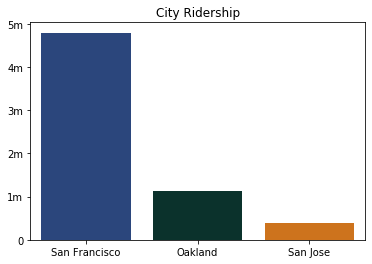

In [12]:
sb.countplot(data = bikes, x = 'start_city', palette=citycolours)

plt.title('City Ridership')

plt.xlabel('')

plt.yticks(np.arange(0, 6e6, 1e6), ['0', '1m', '2m', '3m', '4m', '5m'])
plt.ylabel('')

plt.show();

## User Ridership

Bay Wheels has three user groups; Casuals, Members, and BSFA. Each have their own pricing schemes. Its largest group by far in terms of number of rides are Members, accounting for almost 4 times as many rides as Casuals, the next highest group. BSFA trips are limited as it is only available to qualifying residents of the Bay Area.

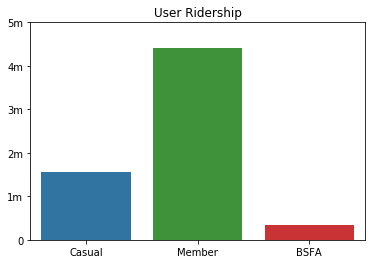

In [13]:
sb.countplot(data = bikes, x = 'user_class', palette=usercolours)

plt.title('User Ridership')


plt.xlabel('')

plt.yticks(np.arange(0, 6e6, 1e6), ['0', '1m', '2m', '3m', '4m', '5m'])
plt.ylabel('')

plt.show();

In [14]:
electric_era = bikes[bikes['started_at'] > dt.datetime(2019, 12, 1)]
paid_electric = bikes[bikes['started_at'] > dt.datetime(2020, 4, 1)]

## Ride Types

During the time in which BayWheels had electric bikes widely available, they have outpaced rides on docked bikes. While some of can be attributed to BayWheels providing electric bikes at no additonal charges until March of 2020, it still doesn't account for those rides in April and May of 2020



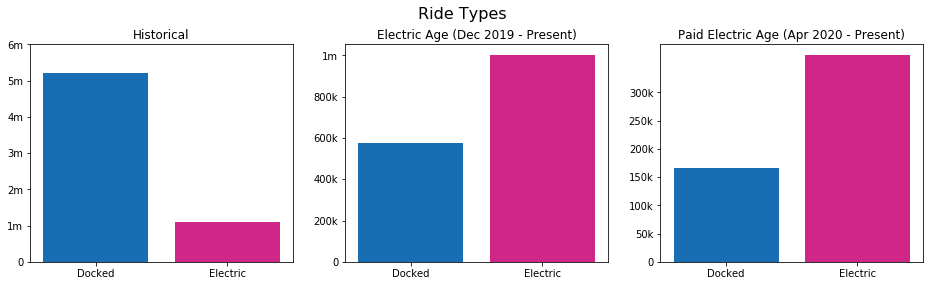

In [15]:
fig = plt.figure(figsize = [16,4])
plt.suptitle('Ride Types', y = 1.01, fontsize = 16)

plt.subplot(1,3,1)
sb.countplot(data = bikes, x = 'ride_type', palette=ridecolours)
plt.title('Historical')


plt.xlabel('')

plt.yticks(np.arange(0, 7e6, 1e6), ['0', '1m', '2m', '3m', '4m', '5m', '6m'])
plt.ylabel('')



plt.subplot(1,3,2)
sb.countplot(data = electric_era, x = 'ride_type', palette=ridecolours)
plt.title('Electric Age (Dec 2019 - Present)')


plt.xlabel('')

plt.yticks(np.arange(0, 12e5, 2e5), ['0', '200k', '400k', '600k', '800k', '1m'])
plt.ylabel('')


plt.subplot(1,3,3)
sb.countplot(data = paid_electric, x = 'ride_type', palette=ridecolours)
plt.title('Paid Electric Age (Apr 2020 - Present)')


plt.xlabel('')

plt.yticks(np.arange(0, 35e4, 5e4), ['0', '50k', '100k', '150k', '200k', '250k', '300k'])
plt.ylabel('')


plt.show();

## Rental Access Method

While the information is only available for 6 months, an overwhelming amount of individuals prefer using Apps over the Clippers while renting bikes. 

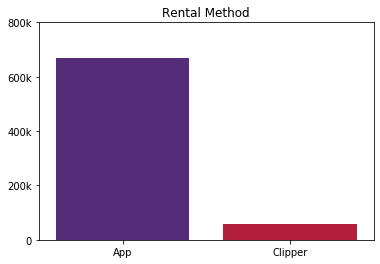

In [16]:
sb.countplot(data = bikes, x = 'rent_method', palette=rentalcolours)

plt.title('Rental Method')


plt.xlabel('')

plt.yticks(np.arange(0, 10e5, 2e5), ['0', '200k', '400k', '600k', '800k'])
plt.ylabel('')

plt.show();

## Hourly Ridership

With the results being bimodal and peaks at 8-10am and 4-7pm, a sizeable portion of Bay Wheel's customer base are probably those who work office type hours.

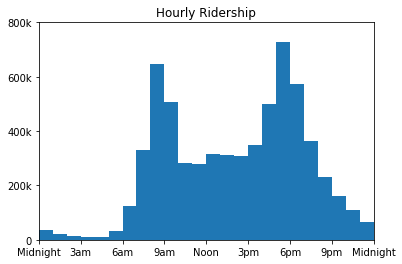

In [17]:
bin_edges = np.arange(0, 24+1, 1)

plt.hist(data = bikes, x = 'start_hour', bins=bin_edges, color = sb.color_palette()[0])

plt.title('Hourly Ridership')

plt.xlim([0,24])

plt.ylim([0, 800000])
plt.yticks([0, 200000, 400000, 600000, 800000], [0, '200k', '400k', '600k', '800k'])

plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24], ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm', 'Midnight'])

plt.show();

## Weekly Ridership

When counting the trips on different days of the week, The weekdays have a maximum difference of about 2%, while the weekends have less than 60% the number of trips compared to their weekday counterparts. A large contributor of BayWheel's user base tend to prefer using bikes on weekdays

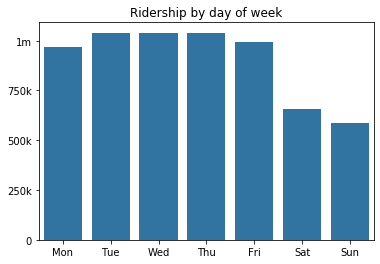

In [18]:
sb.countplot(data = bikes, x = 'dow', color = sb.color_palette()[0])

plt.title('Ridership by day of week')

plt.xlabel('')

plt.yticks(np.arange(0, 125e4, 25e4), ['0', '250k', '500k', '750k', '1m'])
plt.ylabel('')

plt.show();

In [19]:
yymm_edges = []

years = [2017, 2018, 2019, 2020]

for y in years:
    for m in np.arange(1, 12+1, 1):
        yymm_edges.append(dt.date(y, m, 1))

yymm_edges = yymm_edges[6:-4]

yymm_ticks = []

for i in np.arange(0,round(len(yymm_edges)/ 6)+1,1):
    yymm_ticks.append(yymm_edges[(i*6)])

## Monthly Ridership

While there are fluctuations, Bay Wheels' ridership has been on a growing trend until January and February 2020 where ridership hit record highs. January eclipsed their highest of any previous month by 16%, while February exploded seeing another 40%+ increase in ridership before dropping down to almost record lows. April 2020 saw the lowest ridership since their second month of inception almost 3 years ago. While there has been improvement since then, ridership seems to have plateaued during the current global climate with most individuals limiting exposure to others by spending less time in the outside world. 

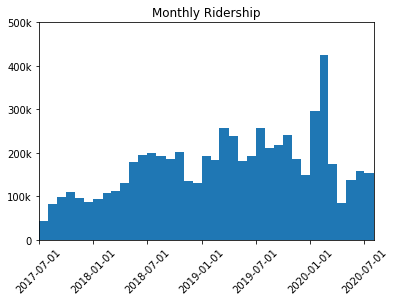

In [20]:
start_date = dt.date(2017, 7, 1)
end_date = dt.date(2020, 8, 1)

plt.hist(data = bikes, x = 'started_at', bins=mpl.dates.date2num(yymm_edges), color = sb.color_palette()[0])
plt.title('Monthly Ridership')

plt.xticks(mpl.dates.date2num(yymm_ticks), rotation = 45)
plt.xlim([mpl.dates.date2num(start_date), mpl.dates.date2num(end_date)])
plt.xlabel('')

plt.yticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], ['0', '100k', '200k' ,'300k', '400k', '500k'])
plt.ylim([0, 5e5])
plt.ylabel('')

plt.show();

In [21]:
y2020_dates = []
holding = []

latest_month = 7


y2020_months = np.arange(1,latest_month+1,1)
y2020_days = np.arange(1, 31+1, 1)

for i in y2020_months:
    for j in y2020_days:
        holding.append([2020,i,j])

# Removes days from months that hold fewer than 31 days
holding = holding[:60] + holding[62:] # chops off feb 30 and 31
holding = holding[:121] + holding[122:] # chops april 31
holding = holding[:182] + holding[183:] # chops off june 31
holding = holding[:274] + holding[275:] # chops off sept 31
holding = holding[:335] + holding[336:] # chops off nov 31





for k in holding:
    y2020_dates.append(dt.date(2020,k[1], k[2]))

if latest_month < 12:
    y2020_dates.append(dt.date(2020,latest_month+1,1))
else:
    y2020_dates.append(dt.date(2021, 1, 1))

In [22]:
weekly_ticks = []

for i in np.arange(0,round(len(y2020_dates)/7),1):
    weekly_ticks.append(y2020_dates[i*7])    
    
biweekly_ticks = []

for j in np.arange(0,round(len(y2020_dates)/14)+1,1):
    biweekly_ticks.append(y2020_dates[j*14])
    
monthly_ticks = []

for k in np.arange(1, 8+1, 1):
    monthly_ticks.append(dt.date(2020, k, 1))

## 2020 Daily Ridership

If it wasn't clear before, 2020 has been some rollercoaster for ridership for Bay Wheels. Starting off incredibly well, from the 42 days between, January 22 and March 4, Bay Wheels had their top 30 of their highest ridership days in this stretch of time. Only afterwards, to have ridership completely tank. When comparing February and April, April has less than a fifth the ridership.

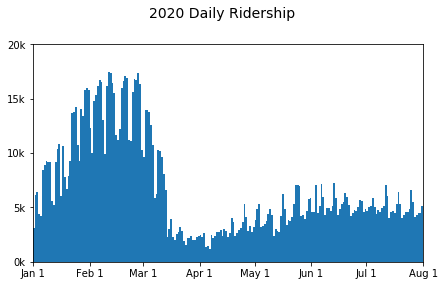

In [23]:
fig = plt.figure(figsize=[7,4])
fig.suptitle('2020 Daily Ridership', y=1.01, fontsize = 14)

ax = plt.subplot(1,1,1)
start_date1 = dt.date(2020, 1, 1)
end_date1 = dt.date(2020, 8, 1)

plt.hist(data = bikes, x = 'start_date', bins=mpl.dates.date2num(y2020_dates))
plt.yticks([0,5000, 10000, 15000, 20000], ['0k','5k', '10k', '15k', '20k'])
plt.xticks(mpl.dates.date2num(monthly_ticks), ['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'May 1', 'Jun 1', 'Jul 1', 'Aug 1'])
plt.xlim([mpl.dates.date2num(start_date1), mpl.dates.date2num(end_date1)])

plt.show();

## Drop in March

The drop steems to have started at Feb 29/Mar 1, and within two weeks dropped from a high of 17,000 trips a day to around of 2,000 less than two weeks later. This drop is no doubt due to the current ongoing Coronavirus outbreak. With a sizeable percentage of the population having to stay at home for most of the day, it makes sense that many people would not be going out and using bikes. 

The lowest single day ridership was just under 1,200 trips a day, in the early parts of April. The stretch between March 14 (Pi Day) to April 24, saw every single day under 5,000 trips. The last time that happened was in the early parts of 2018. Apirl's figures are the lowest Bay Wheels has had in a single month outside of the first three months of the company. 

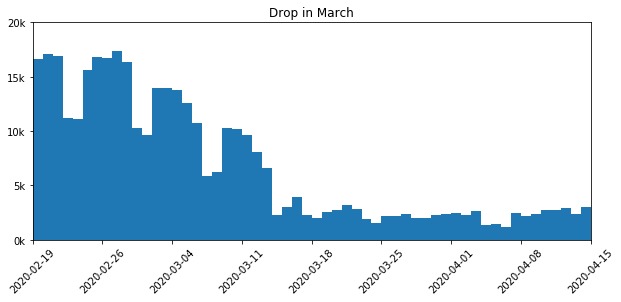

In [24]:
fig = plt.figure(figsize=[10,4])


ax = plt.subplot(1,1,1)
start_date2 = dt.date(2020, 2, 19)
end_date2 = dt.date(2020, 4, 15)

plt.hist(data = bikes, x = 'start_date', bins=mpl.dates.date2num(y2020_dates))
plt.yticks([0,5000, 10000, 15000, 20000], ['0k','5k', '10k', '15k', '20k'])
plt.xticks(mpl.dates.date2num(weekly_ticks), rotation = 45)
plt.xlim([mpl.dates.date2num(start_date2), mpl.dates.date2num(end_date2)])
plt.title('Drop in March')

plt.show();

## Multivariate Exploration

In [25]:
bike_types = bikes[['start_yymm', 'ride_type', 'duration']].groupby(['start_yymm', 'ride_type']).count().reset_index()

bike_types.rename(columns={'duration': 'count'}, inplace=True)

electric_era_types = bike_types[-12:]

## Increase in January and February of 2020

As mentioned previously, BayWheels provided electric bikes to Members at no additional costs, and there is a dramatic increase in the usage of electric bikes in this period. Ridership for docked bikes on the other hand remained steady. 

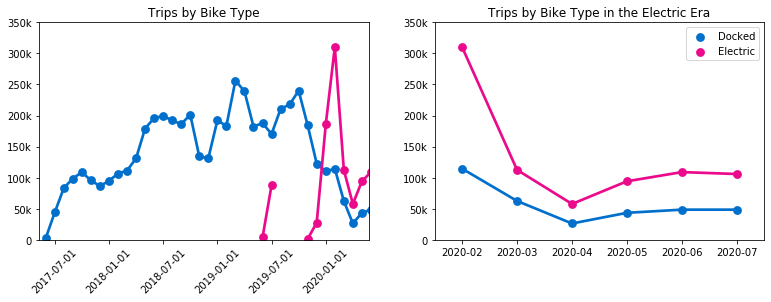

In [26]:
plt.figure(figsize = [13,4], facecolor = 'white')

ax = plt.subplot(1,2,1)
sb.pointplot(data = bike_types, x = 'start_yymm', y = 'count', hue = 'ride_type', palette=ridecolours)
plt.title('Trips by Bike Type')

plt.xticks(np.arange(1,35, 6), yymm_ticks, rotation = 45)
plt.xlim([-0.75, 35.75])
plt.xlabel('')

plt.yticks(np.arange(0, 40e4, 5e4), [0, '50k', '100k', '150k', '200k', '250k', '300k', '350k'])
plt.ylim([0, 35e4])
plt.ylabel('')

l = ax.get_legend().remove()



ax = plt.subplot(1,2,2)
sb.pointplot(data = electric_era_types, x = 'start_yymm', y = 'count', hue = 'ride_type', palette=ridecolours)
plt.title('Trips by Bike Type in the Electric Era')

plt.xlabel('')

plt.yticks(np.arange(0, 40e4, 5e4), [0, '50k', '100k', '150k', '200k', '250k', '300k', '350k'])
plt.ylim([0, 35e4])
plt.ylabel('')



l = ax.legend(bbox_to_anchor=(1, 1))
l.get_texts()[0].set_text('Docked')
l.get_texts()[1].set_text('Electric')


plt.show();

In [27]:
y2020 = bikes[bikes['start_year'] == 2020]
nocorona = y2020[y2020['start_yymm'] <= '2020-02']
corona = y2020[y2020['start_yymm'] > '2020-02']

## Changes in Hourly Ridership

When splitting 2020's hourly ridership into January and February, when the world was normal, to March and onwards when the world wasn't. People seem to favour different times of using bikes. The loss in ridership, specifically at the 7-9am previous peak seems to suggest that many individuals are either not commuting during this hour, or are finding other methods of transportation. The answer is probably the former as many workplaces have implemented a 'Work from Home' policy during the current global situation.  

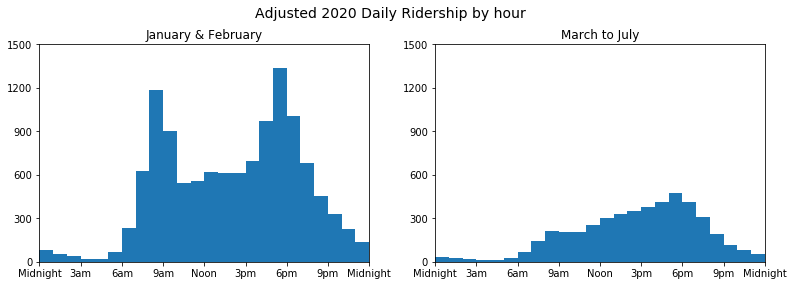

In [28]:
fig = plt.figure(figsize=[13,4])
fig.suptitle('Adjusted 2020 Daily Ridership by hour', y=1.01, fontsize = 14)


bin_edges = np.arange(0, 24+1, 1)


plt.subplot(1,2,1)
plt.hist(data = nocorona, x = 'start_hour', bins=bin_edges)
plt.title('January & February')

plt.xlim([0,24])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24], ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm', 'Midnight']);

plt.ylim([0, 72e3])
plt.yticks(np.arange(0,1800,300)*nocorona['start_date'].nunique(), np.arange(0,1800,300))


plt.subplot(1,2,2)
plt.hist(data = corona, x = 'start_hour', bins=bin_edges)
plt.title('March to July')

plt.xlim([0,24])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24], ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm', 'Midnight']);

plt.ylim([0,138000])
plt.yticks(np.arange(0,1800,300)*corona['start_date'].nunique(), np.arange(0,1800,300))

plt.show();

## Behaviour Differences by User Groups

While breaking down the three different user groups and looking at their Distance, Duration, and Speed throughout the days of the week, there are some differences, specifically when comparing weekdays to weekends. Casual users tend to be more, well, casual. Their trips tend to go slightly farther than the other to user types, the additional time spent on the bike results in the lowest average speed of the three. Members and BSFA users don't seem to alter their behaviours from weekdays to weekends too greatly. The time spent on weekends for Casual users is quite a bit longer than that during the weekdays, resulting in a noticably lower average speed. 

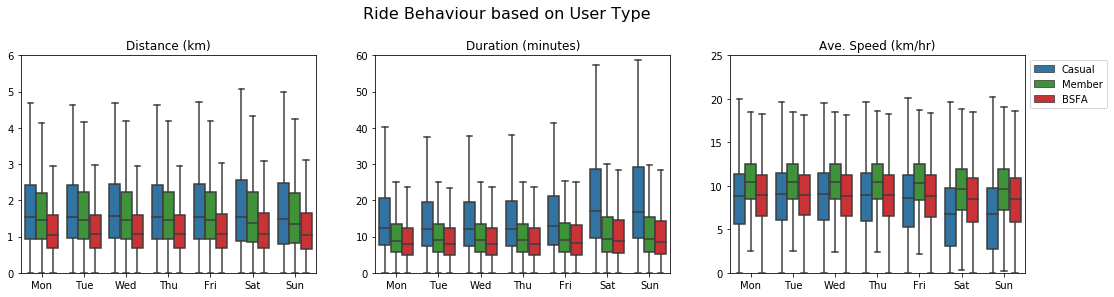

In [29]:
fig = plt.figure(figsize=[18,4])
fig.suptitle('Ride Behaviour based on User Type', fontsize = 16, y = 1.05)


ax = plt.subplot(1,3,1)
sb.boxplot(data = bikes, x = 'dow', y = 'distance', hue = 'user_class', showfliers = False, palette=usercolours)
plt.title('Distance (km)')

plt.xlabel('')

plt.ylabel('')
plt.ylim([0, 6])
plt.yticks([0, 1, 2, 3, 4, 5, 6])

l = ax.get_legend().remove()



ax = plt.subplot(1,3,2)
sb.boxplot(data = bikes, x = 'dow', y = 'duration', hue = 'user_class', showfliers = False, palette=usercolours)
plt.title('Duration (minutes)')

plt.xlabel('')

plt.ylabel('')
plt.ylim([0, 3600])
plt.yticks(np.arange(0,3600+600,600), np.arange(0,60+10,10))

l = ax.get_legend().remove()



ax = plt.subplot(1,3,3)
sb.boxplot(data = bikes, x = 'dow', y = 'speed', hue = 'user_class', showfliers = False, palette=usercolours)
plt.title('Ave. Speed (km/hr)')

plt.xlabel('')

plt.ylabel('')
plt.ylim([0, 25])
plt.yticks([0, 5, 10, 15, 20, 25])

l = ax.legend(bbox_to_anchor=(1, 1))



plt.show();

## Behaviour Difference between Ride Types

While those taking electronic bikes take slightly longer trips, they also tend to spend a bit more time riding. The result is an average speed that is only slightly greater than that of docked bikes. While most users ride their bikes similarly from weekends and weekdays, there is a subset that takes more time. While the first quartile and median are roughly at the same values for duration, duration's third quartile for weekends is noticably higher than that of the weekdays. The carryover results in a lower first quartile for the speed on the weekends.

Another obersvation is how the first to third quartile in speed of docked bikes on weekdays fits within their corresponding values for electric bikes. 



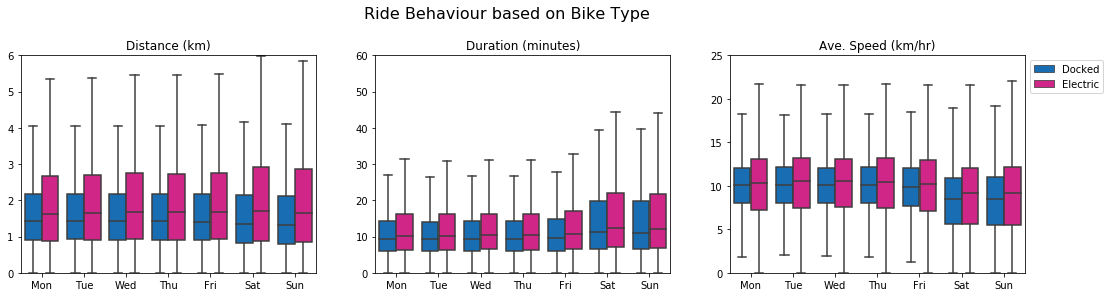

In [30]:
fig = plt.figure(figsize=[18,4])
fig.suptitle('Ride Behaviour based on Bike Type', fontsize = 16, y = 1.05)


ax = plt.subplot(1,3,1)
sb.boxplot(data = bikes, x = 'dow', y = 'distance', hue = 'ride_type', showfliers = False, palette=ridecolours)
plt.title('Distance (km)')

plt.xlabel('')

plt.ylabel('')
plt.ylim([0, 6])
plt.yticks([0, 1, 2, 3, 4, 5, 6])

l = ax.get_legend().remove()



ax = plt.subplot(1,3,2)
sb.boxplot(data = bikes, x = 'dow', y = 'duration', hue = 'ride_type', showfliers = False, palette=ridecolours)
plt.title('Duration (minutes)')

plt.xlabel('')

plt.ylabel('')
plt.ylim([0, 3600])
plt.yticks(np.arange(0,3600+600,600), np.arange(0,60+10,10))

l = ax.get_legend().remove()



ax = plt.subplot(1,3,3)
sb.boxplot(data = bikes, x = 'dow', y = 'speed', hue = 'ride_type', showfliers = False, palette=ridecolours)
plt.title('Ave. Speed (km/hr)')

plt.xlabel('')

plt.ylabel('')
plt.ylim([0, 25])
plt.yticks([0, 5, 10, 15, 20, 25])

l = ax.legend(bbox_to_anchor=(1, 1))



plt.show();

In [31]:
minutes = np.arange(0,120+1,1)
pricing = pd.DataFrame(minutes)
pricing.rename(columns={0: 'minutes'}, inplace=True)

casual_dock = [2]*31 + [5]*15 + [8]*15 + [11]*15 + [14]*15 + [17]*15 + [20]*15
pricing['casual_dock'] = casual_dock
pricing['casual_extra'] = pricing['minutes'] * 0.20
pricing['casual_electric'] = pricing['casual_dock'] + pricing['casual_extra']


member_dock = [0]*46 + [3]*15 + [6]*15 + [9]*15 + [12]*15 + [15]*15
pricing['member_dock'] = member_dock
pricing['member_extra'] = pricing['minutes'] * 0.15
pricing['member_electric'] = pricing['member_dock'] + pricing['member_extra']


bsfa_dock = [0]*61 + [3]*15 + [6]*15 + [9]*15 + [12]*15
pricing['bsfa_dock'] = bsfa_dock
pricing['bsfa_extra'] = pricing['minutes'] * 0.05
pricing['bsfa_extra'][21:] = 1
pricing['bsfa_electric'] = pricing['bsfa_dock'] + pricing['bsfa_extra']


pricing.drop(['casual_extra', 'member_extra', 'bsfa_extra'], axis=1, inplace=True)

price_melt = pd.melt(pricing, id_vars='minutes', value_vars=list(pricing.columns[1:]))
price_melt.rename(columns = {'variable': 'method', 'value': 'price'}, inplace=True)

annual_pricing = {'method': ['Casual', 'Member', 'BSFA'],
                 'price': [0, 149, 5]}

annual = pd.DataFrame.from_dict(annual_pricing)

## Pricing by different users

Bay Wheels' [pricing](https://www.lyft.com/bikes/bay-wheels/pricing) can be a bit complicated to get through. There are 3 different pricing categories for the 2 classes of bikes. Given the the quick rise in price, it is easy to justify having an annual membership. 

For an average 10 minute trip on a normal bike, the breakeven is after the 75th trip, or one trip every 5 days. For e-bikes, this lowers to after 60 trips, or one trip every 6 days. Considering this as a mode of transportation for someone looking to get to and from work 5 days a week, they would make around 500 trips a year (so long as they aren't working from home), at a 10 minuts each way, that would be \\$1,000 for Casuals, or \$149 for Members on Docked bikes and \\$2,000 and \$900 respectively for electric options. Easy to see why it has become popular. Granted, no reasonable consumer would pay that much and remain a casual user, but it would be the cost nonetheless. 

Another aspect to note is that the way the pricing is set up, riders are incentivized to get off the bike as fast as possible. While there is a certain amount of time given before additional charges are incurred, it is always more economical to stop that rental and rent a new bike instead of getting that extra charge. 

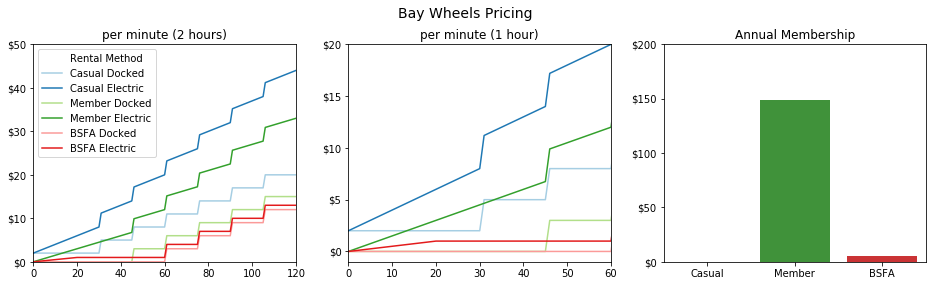

In [32]:
plt.figure(figsize = [16,4], facecolor = 'white')
plt.suptitle('Bay Wheels Pricing', y=1.01, fontsize = 14)

ax = plt.subplot(1,3,1)
g = sb.lineplot(data = price_melt, x = 'minutes', y = 'price', hue = 'method', palette=sb.color_palette("Paired")[0:6])
plt.title('per minute (2 hours)')

lg = g.axes.get_legend()
labels = ['Rental Method', 'Casual Docked', 'Casual Electric', 'Member Docked', 'Member Electric', 'BSFA Docked', 'BSFA Electric']
for t, l in zip(lg.texts, labels): t.set_text(l)
    
plt.xlim([0, 120])
plt.xticks(np.arange(0, 120+20, 20))
plt.xlabel('')

plt.ylim(0, 50)
plt.yticks(np.arange(0, 50+10, 10), ['$0', '$10', '$20', '$30', '$40', '$50'])
plt.ylabel('') 


ax = plt.subplot(1,3,2)
g = sb.lineplot(data = price_melt, x = 'minutes', y = 'price', hue = 'method', palette=sb.color_palette("Paired")[0:6])
plt.title('per minute (1 hour)')

l = ax.get_legend().remove()

    
plt.xlim([0, 60])
plt.xticks(np.arange(0, 60+10, 10))
plt.xlabel('')

plt.ylim(-1, 20)
plt.yticks(np.arange(0, 20+5, 5), ['$0', '$5', '$10', '$15', '$20'])
plt.ylabel('') 

ax = plt.subplot(1,3,3)
sb.barplot(data = annual, x = 'method', y = 'price', palette = usercolours)
plt.title('Annual Membership')

plt.xlabel('')

plt.yticks(np.arange(0,200+50,50), ['$0', '$50', '$100', '$150', '$200'])
plt.ylim([0,200])
plt.ylabel('')

plt.show();

In [33]:
hour_dow_user = bikes[['start_hour', 'dow', 'user_class', 'duration']].groupby(['start_hour', 'dow', 'user_class']).count()
hour_dow_user.rename(columns = {'duration': 'count'}, inplace=True)
hour_dow_user.reset_index(inplace=True)

hour_dow_member = hour_dow_user[hour_dow_user['user_class'] == 'Member']
hour_dow_casual = hour_dow_user[hour_dow_user['user_class'] == 'Casual']
hour_dow_bsfa = hour_dow_user[hour_dow_user['user_class'] == 'BSFA']

## Hourly Ridership by Different User Groups

While most of the lines have some overlapping making it slightly difficult to distinguish which lines are where, the weekdays and weekends seem to group themselves together. Using the peaks, it is it can probably be said that a large segment of BayWheel's customers are those working the Monday to Friday, 9-5 office job. Casual users have similar spikes while having a more active weekend userbase comparitively. With BSFA weekends move somewhat similarly to the other two, but there doesn't seem to be too much of a pattern on weekdays. There is a rise at 7-9 similar to Members and Casuals, but it plateaus until the evening instead of forming a mid-day trough. 

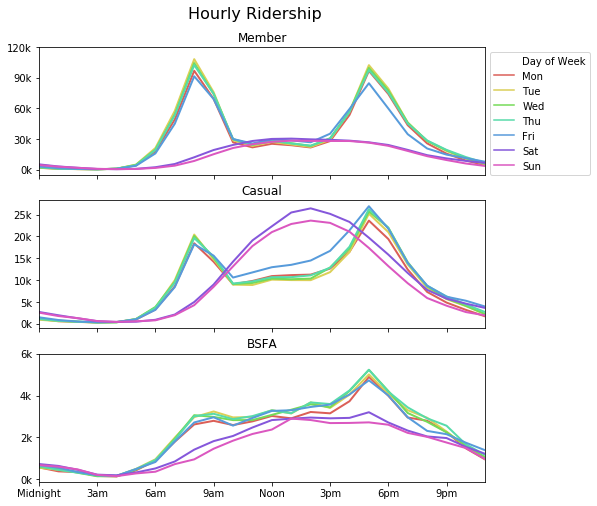

In [34]:
plt.figure(figsize=[8,8])
plt.suptitle('Hourly Ridership', fontsize = 16, y = 0.95)



ax = plt.subplot(3,1,1)
sb.lineplot(data = hour_dow_member, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('Member')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['', '', '', '', '', ''])
plt.yticks([0, 30000, 60000, 90000, 120000], ['0k', '30k', '60k', '90k', '120k'])

l = ax.legend(bbox_to_anchor=(1, 1))
l.get_texts()[0].set_text('Day of Week')



ax = plt.subplot(3,1,2)
sb.lineplot(data = hour_dow_casual, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('Casual')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['', '', '', '', '', ''])
plt.yticks([0, 5000, 10000, 15000, 20000, 25000], ['0k', '5k', '10k', '15k', '20k', '25k'])

l = ax.get_legend().remove()



ax = plt.subplot(3,1,3)
sb.lineplot(data = hour_dow_bsfa, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('BSFA')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm',])
plt.yticks([0, 2000, 4000, 6000], ['0k', '2k', '4k', '6k'])

l = ax.get_legend().remove()


plt.show();

In [35]:
hour_dow_city = bikes[['start_hour', 'dow', 'start_city', 'duration']].groupby(['start_hour', 'dow', 'start_city']).count()
hour_dow_city.rename(columns = {'duration': 'count'}, inplace=True)
hour_dow_city.reset_index(inplace=True)

hour_dow_oak = hour_dow_city[hour_dow_city['start_city'] == 'Oakland']
hour_dow_fran = hour_dow_city[hour_dow_city['start_city'] == 'San Francisco']
hour_dow_jose = hour_dow_city[hour_dow_city['start_city'] == 'San Jose']

## Hourly Ridership by Different Cities

San Francisco's hourly ridership looks nearly identical to that of Members (even with the same scaling), and with some scaling, so does Oakland's. Slight difference being that in the two city graphs, the mid-day weekend peak slightly exceeds that of the weekday's mid-day trough. This would be the comination of the Casual users as the mid-day peak is at the same level to their weekday peaks. 

Interestingly, San Jose's graph looks eerily similar to that of BSFA's graph, where there is a rise during weekdays at 7-9am, before plateauing off before another rise at the evening. 

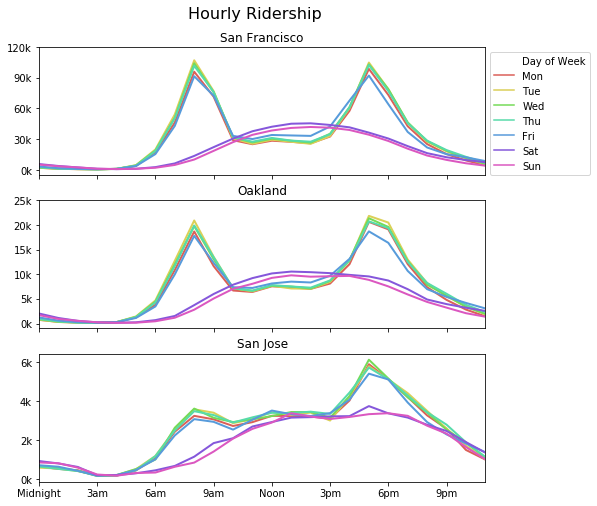

In [36]:
plt.figure(figsize=[8,8])
plt.suptitle('Hourly Ridership', fontsize = 16, y = 0.95)



ax = plt.subplot(3,1,1)
sb.lineplot(data = hour_dow_fran, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('San Francisco')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['', '', '', '', '', ''])
plt.yticks([0, 30000, 60000, 90000, 120000], ['0k', '30k', '60k', '90k', '120k'])

l = ax.legend(bbox_to_anchor=(1, 1))
l.get_texts()[0].set_text('Day of Week')



ax = plt.subplot(3,1,2)
sb.lineplot(data = hour_dow_oak, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('Oakland')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['', '', '', '', '', ''])
plt.yticks([0, 5000, 10000, 15000, 20000, 25000], ['0k', '5k', '10k', '15k', '20k', '25k'])

l = ax.get_legend().remove()



ax = plt.subplot(3,1,3)
sb.lineplot(data = hour_dow_jose, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('San Jose')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm'])
plt.yticks([0, 2000, 4000, 6000], ['0k', '2k', '4k', '6k'])

l = ax.get_legend().remove()


plt.show();

## BSFA and San Jose Hourly Ridership

While they aren't exactly the same, they are close together than the other two cities and the other two user groups are to these two. Could they share a group of users that lead to this

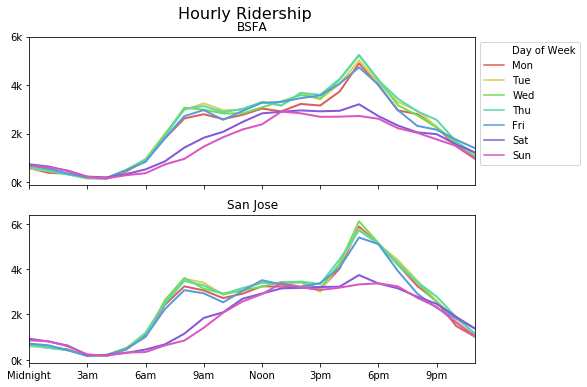

In [37]:
plt.figure(figsize=[8,6])
plt.suptitle('Hourly Ridership', fontsize = 16, y = 0.95)



ax = plt.subplot(2,1,1)
sb.lineplot(data = hour_dow_bsfa, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('BSFA')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['','','','','','','',''])
plt.yticks([0, 2000, 4000, 6000], ['0k', '2k', '4k', '6k'])

l = ax.legend(bbox_to_anchor=(1, 1))
l.get_texts()[0].set_text('Day of Week')


ax = plt.subplot(2,1,2)
sb.lineplot(data = hour_dow_jose, x = 'start_hour', y = 'count', hue = 'dow', palette='hls', lw=2)

plt.title('San Jose')
plt.xlabel('')
plt.ylabel('')

plt.xlim([0,23])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21], ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm'])
plt.yticks([0, 2000, 4000, 6000], ['0k', '2k', '4k', '6k'])



l = ax.get_legend().remove()



plt.show();

In [38]:
usercity = bikes[bikes['start_year'].isin([2018,2019, 2020])]
usercity = usercity[['start_city', 'user_class', 'duration']].groupby(['start_city', 'user_class']).count()
usercity.reset_index(inplace=True)
usercity.rename(columns={'duration':'actual'}, inplace=True)


uc_oak = usercity[usercity['start_city'] == 'Oakland']
uc_fran = usercity[usercity['start_city'] == 'San Francisco']
uc_jose = usercity[usercity['start_city'] == 'San Jose']

uc_oak['city_sum'] = uc_oak['actual'].sum()
uc_fran['city_sum'] = uc_fran['actual'].sum()
uc_jose['city_sum'] = uc_jose['actual'].sum()

ucgroup = uc_fran.append(uc_oak).append(uc_jose)


uc_bsfa = ucgroup[ucgroup['user_class'] == 'BSFA']
uc_casual = ucgroup[ucgroup['user_class'] == 'Casual']
uc_member = ucgroup[ucgroup['user_class'] == 'Member']

uc_bsfa['user_sum'] = uc_bsfa['actual'].sum()
uc_casual['user_sum'] = uc_casual['actual'].sum()
uc_member['user_sum'] = uc_member['actual'].sum()

ucgroup = uc_casual.append(uc_member).append(uc_bsfa)


ucgroup['city_perc'] = ucgroup['city_sum'] / ucgroup['actual'].sum()
ucgroup['user_perc'] = ucgroup['user_sum'] / ucgroup['actual'].sum()

ucgroup['expect_perc'] = ucgroup['city_perc'] * ucgroup['user_perc']
ucgroup['actual_perc'] = ucgroup['actual'] / ucgroup['actual'].sum()

ucgroup['expected'] = round(ucgroup['expect_perc'] * ucgroup['actual'].sum())
ucgroup['diff_perc'] = (ucgroup['actual'] - ucgroup['expected']) / ucgroup['expected']

ucgroup.drop(['city_sum', 'user_sum', 'city_perc', 'user_perc'], axis=1, inplace=True)

## Expected vs Actual rides by cities and user groups

The expectation that the different user types are distributed proportionately throught the different cities is not accurate. The most notable difference is users under the BSFA program, specifically those living in San Jose. San Jose has almost as many BSFA trips as San Francisco, despite having less than 10% of the total number of trips taken. San Jose is also the only city that has the largest share of their trips being BSFA trips. The other have Members, Casuals, then BSFA

BSFA is Bay Wheels' low income program, and it is difficult to know exactly what is going on without more information on how Bay Wheels runs their BSFA program. Barring a massive discrepancy in the average number of trips made these users in the three cities, San Francisco, San Jose and Oakland have roughly the same number of BSFA users. 

As the three cities have roughly the same number of trips, I would suspect that Bay Wheels is required to fit some quota, of fulfilling their BSFA program. Given that there are far fewer users in San Jose, users who wouldn't normally be qualified for BSFA in San Francisco are able to into the program in San Jose. 

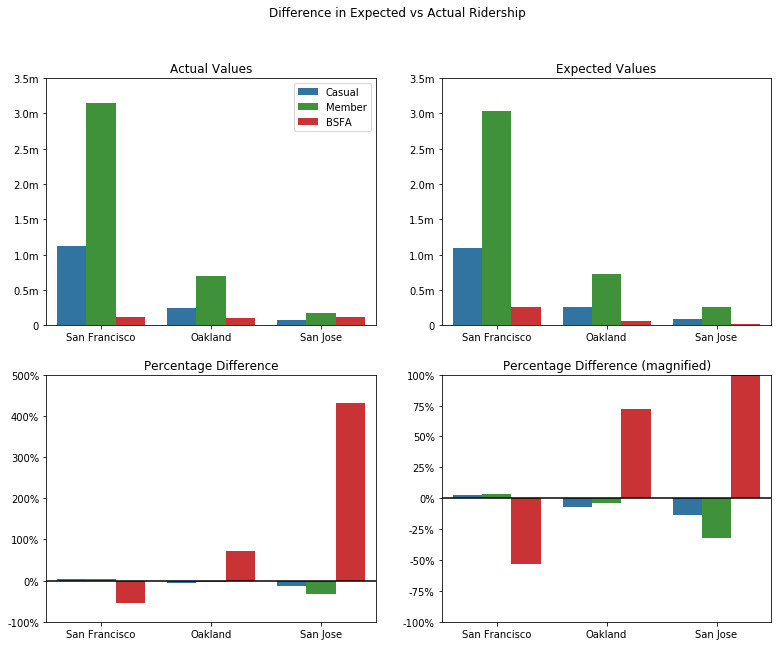

In [39]:
plt.figure(figsize = [13,10], facecolor = 'white')
plt.suptitle('Difference in Expected vs Actual Ridership')

ax = plt.subplot(2,2,1)
sb.barplot(data = ucgroup, x = 'start_city', y = 'actual', hue = 'user_class', palette = usercolours)
plt.title('Actual Values')

plt.xlabel('')

plt.yticks(np.arange(0, 35e5+5e5, 5e5), ['0', '0.5m', '1.0m', '1.5m', '2.0m', '2.5m', '3.0m', '3.5m'])
plt.ylim([0, 3.5e6])
plt.ylabel('')

l = ax.legend(loc=1)



ax = plt.subplot(2,2,2)
sb.barplot(data = ucgroup, x = 'start_city', y = 'expected', hue = 'user_class', palette = usercolours)
plt.title('Expected Values')

plt.xlabel('')

plt.yticks(np.arange(0, 35e5+5e5, 5e5), ['0', '0.5m', '1.0m', '1.5m', '2.0m', '2.5m', '3.0m', '3.5m'])
plt.ylim([0, 3.5e6])
plt.ylabel('')

l = ax.get_legend().remove() 


ax = plt.subplot(2,2,3)
sb.barplot(data = ucgroup, x = 'start_city', y = 'diff_perc', hue = 'user_class', palette = usercolours)
plt.title('Percentage Difference')

plt.xlabel('')

plt.yticks(np.arange(-1, 6, 1), ['-100%', '0%', '100%', '200%', '300%', '400%', '500%'])
plt.ylim([-1, 5])
plt.ylabel('')

plt.axhline(0, color='black')


l = ax.get_legend().remove() 



ax = plt.subplot(2,2,4)
sb.barplot(data = ucgroup, x = 'start_city', y = 'diff_perc', hue = 'user_class', palette = usercolours)
plt.title('Percentage Difference (magnified)')

plt.xlabel('')

plt.yticks(np.arange(-1, 1+0.25, 0.25), ['-100%', '-75%', '-50%', '-25%', '0%', '25%', '50%', '75%', '100%'])
plt.ylim([-1, 1])
plt.ylabel('')

plt.axhline(0, color='black')


l = ax.get_legend().remove() 



plt.show();

In [40]:
city_summary = bikes[['start_city', 'start_id', 'duration']].groupby(['start_id', 'start_city']).count().groupby(['start_city']).count()
city_summary.rename(columns = {'duration': 'bike_stations'}, inplace=True)

city_summary['bike_trips'] = bikes[['start_city', 'duration']].groupby('start_city').count().values

city_summary['population'] = [433031, 881549, 1021795]
city_summary['total_area'] = [201.66, 600.59, 467.55] 
city_summary['land_area'] = [144.76, 121.46, 459.75]

# City Data was taken from:
# https://en.wikipedia.org/wiki/Oakland,_California
# https://en.wikipedia.org/wiki/San_Francisco
# https://en.wikipedia.org/wiki/San_Jose,_California

city_summary['without_vehicles_perc'] = [16.7, 29.9, 5.1]
city_summary['cars_per_household'] = [1.45, 1.10, 2.12]

#Data taken from https://www.governing.com/gov-data/car-ownership-numbers-of-vehicles-by-city-map.html

city_summary['pop_total_density'] = city_summary['population'] / city_summary['total_area']
city_summary['pop_land_density'] = city_summary['population'] / city_summary['land_area']
city_summary['pop_per_station'] = city_summary['population'] / city_summary['bike_stations']
city_summary['station_area_density'] = city_summary['bike_stations'] / city_summary['land_area']
city_summary['trips_per_station'] = city_summary['bike_trips'] / city_summary['bike_stations']
city_summary['trips_per_population'] = city_summary['bike_trips'] / city_summary['population']
city_summary['pop_without_vehicle'] = city_summary['population'] * city_summary['without_vehicles_perc'] / 100

city_summary.reset_index(inplace=True)

city_summary.start_city.replace('San Francisco', 'San Fran', inplace=True)

## What makes a city ideal for Bike Sharing?

While the three city sample size isn't a great sample size, it can potentially be used to see what characteristics lead to a more successful city for Bikesharing. While a large population might seem important, metrics of Population Density, and Population without a vehicle might be more suitable to finding possible future cities for Bike sharing. 

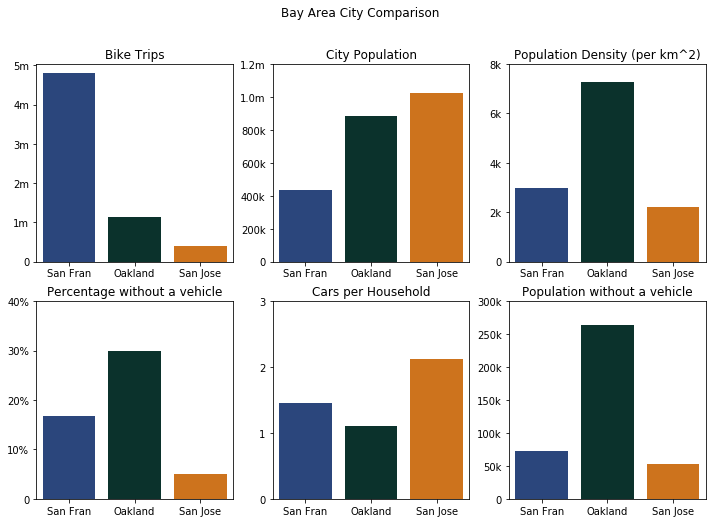

In [41]:
plt.figure(figsize = [12,8], facecolor = 'white')
plt.suptitle('Bay Area City Comparison')


ax = plt.subplot(2,3,1)
sb.barplot(data = city_summary, x = 'start_city', y = 'bike_trips', palette=citycolours)
plt.title('Bike Trips')

plt.xlabel('')
plt.yticks(np.arange(0, 5e6+1e6, 1e6), [0, '1m', '2m', '3m', '4m', '5m'])
plt.ylabel('')


ax = plt.subplot(2,3,2)
sb.barplot(data = city_summary, x = 'start_city', y = 'population', palette=citycolours)
plt.title('City Population')

plt.xlabel('')
plt.yticks(np.arange(0,12e5+2e5, 2e5), [0, '200k', '400k', '600k', '800k', '1.0m', '1.2m'])
plt.ylabel('')


ax = plt.subplot(2,3,3)
sb.barplot(data = city_summary, x = 'start_city', y = 'pop_land_density', palette=citycolours)
plt.title('Population Density (per km^2)')

plt.xlabel('')
plt.yticks(np.arange(0, 8000+2000, 2000), ['0', '2k', '4k', '6k', '8k'])
plt.ylabel('')


ax = plt.subplot(2,3,4)
sb.barplot(data = city_summary, x = 'start_city', y = 'without_vehicles_perc', palette=citycolours)
plt.title('Percentage without a vehicle')

plt.xlabel('')
plt.yticks(np.arange(0, 40+10, 10), ['0', '10%', '20%', '30%' ,'40%'])
plt.ylabel('')



ax = plt.subplot(2,3,5)
sb.barplot(data = city_summary, x = 'start_city', y = 'cars_per_household', palette=citycolours)
plt.title('Cars per Household')

plt.xlabel('')
plt.yticks(np.arange(0,3+1,1))
plt.ylabel('')


ax = plt.subplot(2,3,6)
sb.barplot(data = city_summary, x = 'start_city', y = 'pop_without_vehicle', palette=citycolours)
plt.title('Population without a vehicle')

plt.xlabel('')
plt.yticks(np.arange(0,30e4+5e4,5e4), ['0', '50k', '100k', '150k', '200k', '250k', '300k'])
plt.ylabel('')



plt.show();